1/1 [==============================] - 1s 888ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 182ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 166ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 40ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 168ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 42ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 166ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 41ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 197ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 173ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 167ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 45ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 166ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 44ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 177ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 46ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 178ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 184ms/step


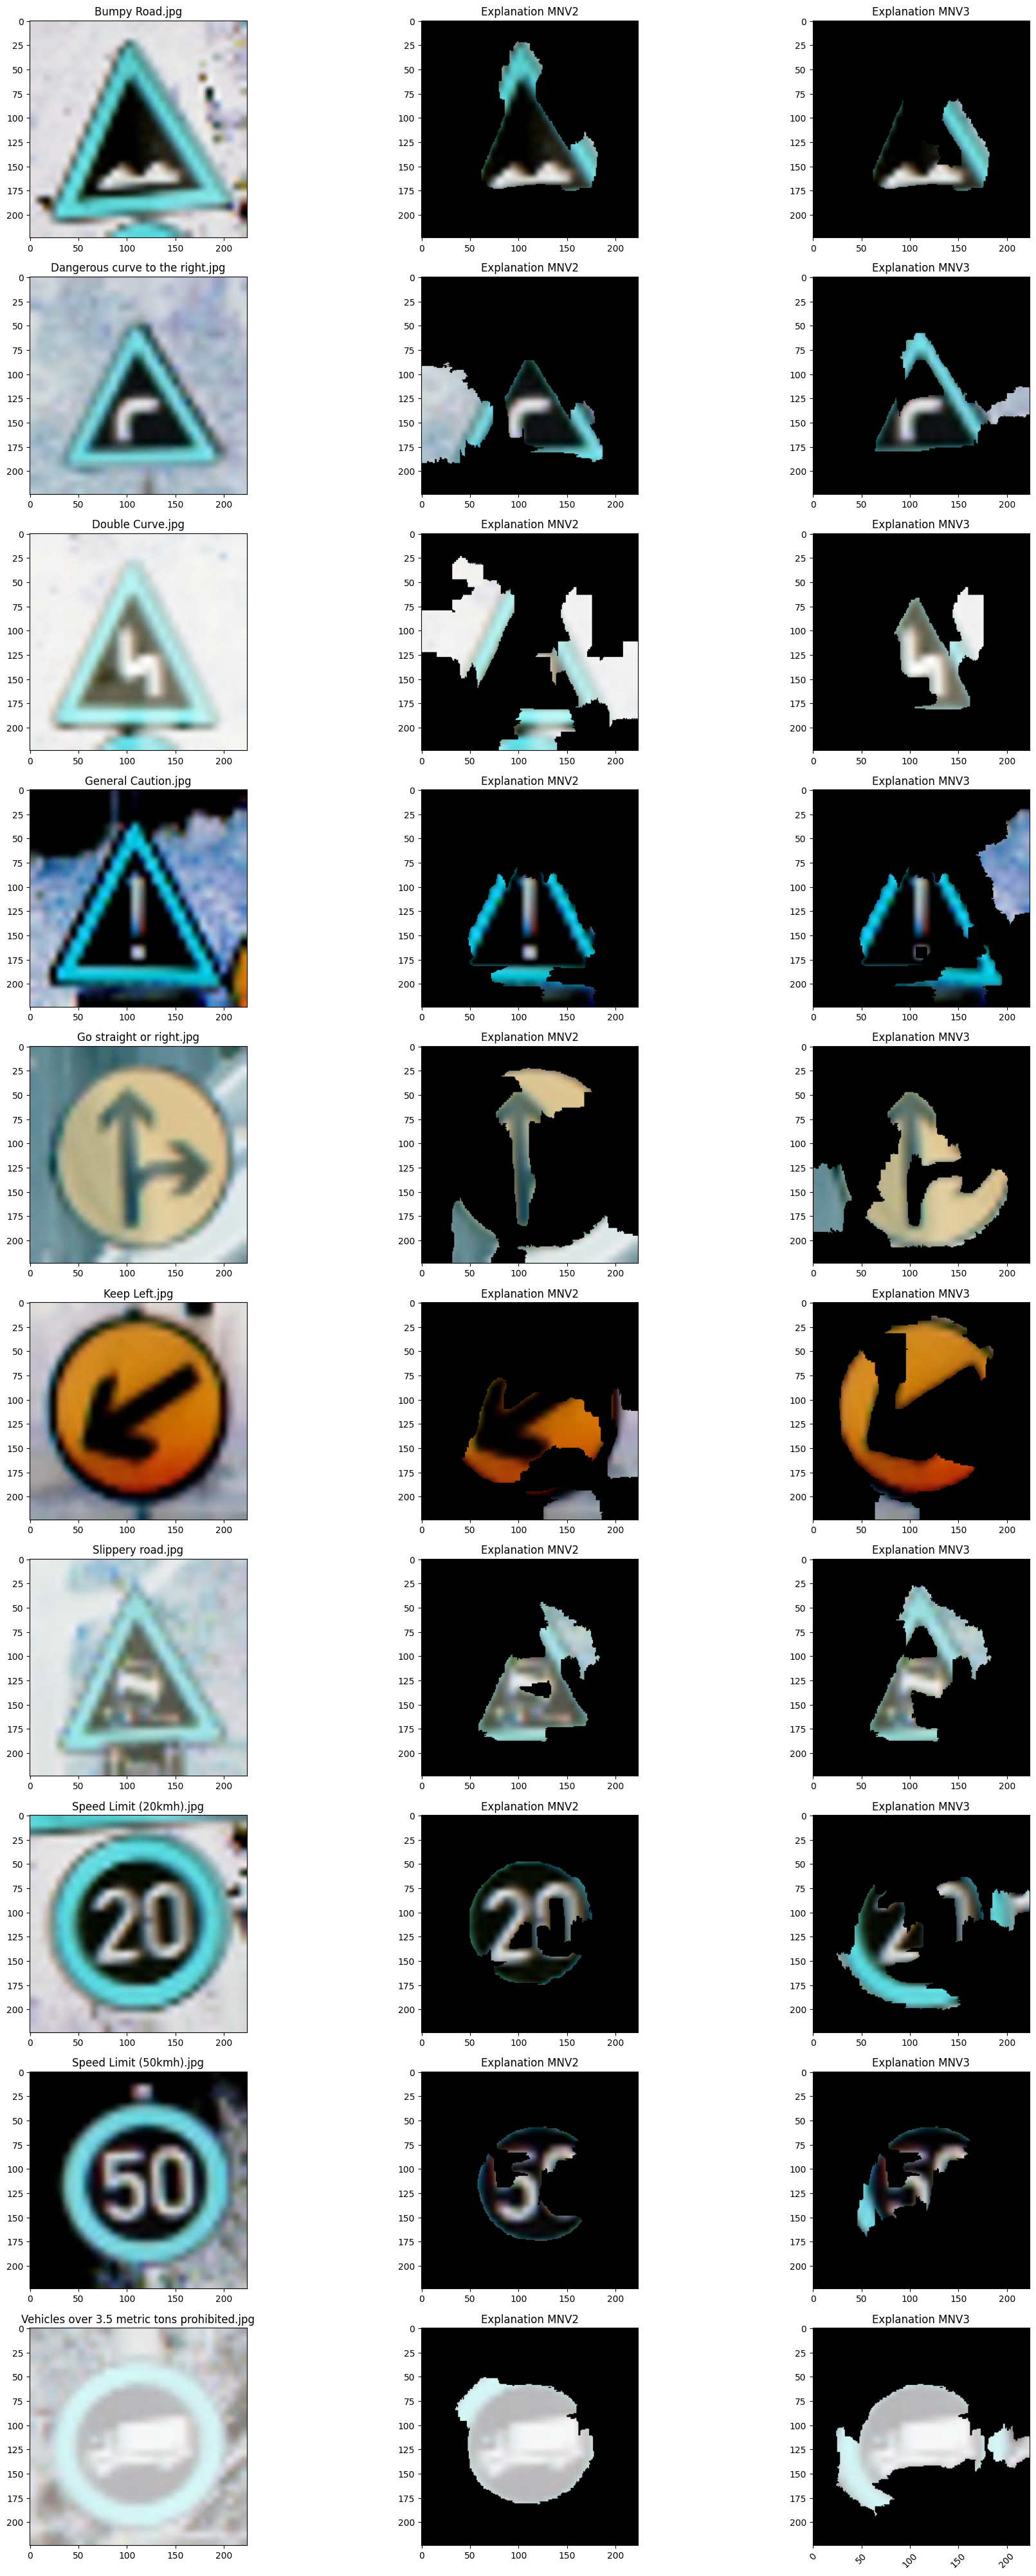

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import load_model
import lime
from lime import lime_image

#Load test images
test_images_path = "F:/DATASET/XAI SAMPLES"
test_image_files = os.listdir(test_images_path)

#Load models
model_mobilenetv2 = load_model("tl_mnv2.h5")
model_mobilenetv3 = load_model("mobilenetv3_Large_traffic_signs.h5")

#Initialize explainer
explainer = lime_image.LimeImageExplainer()

num_images = 10

fig, axs = plt.subplots(num_images, 3, figsize=(20, 40))

for i in range(num_images):
    # Load image
    image_path = os.path.join(test_images_path, test_image_files[i])
    image = load_img(image_path, target_size=(224, 224))
    image_array = img_to_array(image)
    image_array /= 255.0  # Normalize

    # Get predictions
    pred_mobilenetv2 = model_mobilenetv2.predict(np.expand_dims(image_array, axis=0))
    pred_mobilenetv3 = model_mobilenetv3.predict(np.expand_dims(image_array, axis=0))

    # Get explanations
    explanation_mobilenetv2 = explainer.explain_instance(image_array, model_mobilenetv2.predict, top_labels=5)
    explanation_mobilenetv3 = explainer.explain_instance(image_array, model_mobilenetv3.predict, top_labels=5)

    # Display original image
    axs[i, 0].imshow(image)
    axs[i, 0].set_title(test_image_files[i])

    # Display explanation for MobileNetV2
    temp, mask = explanation_mobilenetv2.get_image_and_mask(explanation_mobilenetv2.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    axs[i, 1].imshow(temp)
    axs[i, 1].set_title('Explanation MNV2')

    # Display explanation for MobileNetV3
    temp, mask = explanation_mobilenetv3.get_image_and_mask(explanation_mobilenetv3.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
    axs[i, 2].imshow(temp)
    axs[i, 2].set_title('Explanation MNV3')

# Adjust layout and rotate labels
plt.tight_layout()
plt.xticks(rotation=45)
plt.show()

In [3]:
# Path for saving images
save_path = "F:/Traffic Signs XAI"

# Save the figure
fig.savefig(os.path.join(save_path, "explanations.png"))